# Proyecto de Recursos Humanos

Vamos a predecir que empleados de una empresa son mas probables que la dejen y busquen otro trabajo. 

**Objetivo:** localizar los potenciales candidatos a abandonar la empresa, incluso entender por qué dejan la empresa

# TAREA 1: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**IMPORTAMOS LA DATA**

In [2]:
employee_df = pd.read_csv("Human_Resources.csv")
    #Variables importantes
        #Age := la edad influye, pues mientras mas grande la persona mas 
        #       necesidad tiene de tener un trabajo fijo
        #Attrition := Abandono
        #BusinessTravel := la frecuencia con la que viaja
        #DailyRate := ingresos diarios
        #Departament := departamento al que pertenecen
        #DistanceFromHome := distancia en kilimetros desde casa al trabajo
        #Education := nivel de educación
        #EnviromentSatisfaction := nivel de satisfacción del empleado con el
        #                          entorno
        #JobSatisfaction := nivel de satisfacción con su trabajo
        #RelationshipSatisfaction := nivel de satisfacción con jefe, compañeros
        #Gender := género
        #HourlyRate := pago por hora
        #JobInvolvement := involucracion en el trabajo
        #JobLevel := nivel de trabajo: junior, senior, super senior, manager
        #MaritalStatus := estado civil
        #MonthlyIncome := ingreso mensual
        #NumCompaniesWorked := numero de compañías en las que ha trabajado antes
        #OverTime := trabajo extra 
        #PerformanceRating := mejora en su trabajo, es decir, aprende nuevas 
        #                     habilidades lo cual conlleva a que tenga un mejor
        #                     curriculum
        #StandarHours := horas estandar de trabajo
        #StockOptionalLevel := acciones que tiene de la empresa
        #TotalWorkingYears := numero total de años trabajados
        #YearsSinceLastPromotion := cuantos años ha pasado desde el último 
        #                           ascenso
        #YearsWithCurrManager := cuantos años lleva trabajando con el mismo
        #                        manager

**CABECERA DE LA DATA**

In [3]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**COLA DE LA DATA**

In [4]:
employee_df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


**DESCRIPCIÓN DE LA DATA**

In [5]:
#Veamos el tipo de dato de cada variable
employee_df.info()
    #Resultado:
        # 35 características o variables en total, cada una con 1470 puntos de datos

        #Existen 26 variables enteras de 64 bits.
        #Existen 9 objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#Cual es el promedio de todas las variables
employee_df.describe()
    #Resultado:
        #la media de edad es de 36 años
        #la media de tasa diaria es de $802
        #etc.
        
    #Otra forma: np.mean(employee_df.Age)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


notemos que las comlumnas "Attrition", "Over18" y "OverTime" son categóricas, y para nuestro análisis las necesitamos de formato numérico, entonces reemplazaremos "Yes" por 1 y "NO" por 0.

In [7]:
# Reemplazamos las columnas 'Attritition', 'Over18', 'OverTime' por enteros antes de poder llevar a cabo cualquier visualización

#Para 'Attritition'
employee_df['Attrition']=employee_df['Attrition'].apply(lambda x: 1 if x =='Yes' else 0)
    #.apply() := esta funcion aplica una funcion 'lambda' a cada elemento "x" de la variable "employee_df['Attrition']"

#Para 'Over18'
employee_df['Over18']=employee_df['Over18'].apply(lambda x: 1 if x=='Y' else 0)

#Para 'OverTime'
employee_df['OverTime']=employee_df['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)

#Para comprobar si se ha efectuado el cambio
    #Opcion 1: employee_df.head(5), pero como son 35 variables, no muestra toda las variables
    #Opcion 2: employee_df['OverTime'].head(4), ahi veo el cambio de cada columna
    
#OBSERVACION:
    #Al ejecutar la 1ra linea de comando de esta celda, si que se ha cambiado "Yes" por 1 y "NO" por 0, pero al volver
    #a ejecutar la misma celda pero la 2da linea, Python al no encontrar la palabra "Yes" en la columna "Attrition" vuelve
    #a reemplazar por 0 a toda la columna. Mucho OJO. 
    
    #Solución: correr nuevamente la celda donde se lee la data, y al ultimo de que ya se ha comprobado el cambio correcto
    #en todas las variables que busco, ejecutar una vez mas esta celda. 

<AxesSubplot:>

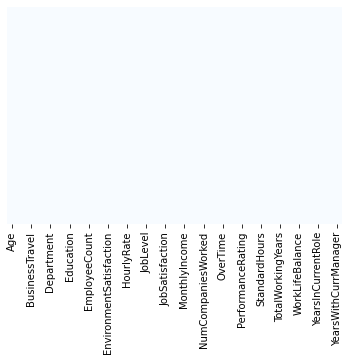

In [8]:
# Veamos si nos faltan datos, es decir, ¿Hay NAs?
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")
    #sns.heatmap() := del paquete "seaborn", la función ".heatmap()" es un mapa de calor que pinta los NAs ".isnull()" 
    #                 que tenga la data "employee_df"
    #yticklabels=False :=  elimina la etiqueta del eje y
    #cbar=False := elimina la barra de calor que sale por defecto, ¿por qué?, porque como la pregunta es ".isnull()", las
    #              unicas respuestas son: TRUE y FALSE, entonces es un mapa de calor binario, basta entonces que pinte con un
    #              color (que trae por defecto) al TRUE, y deje en blanco al FALSE.
    #cmap="Blues" := el mapa de colores a elegir, es la paleta de azules


    #Resultado: 
        #Gráfico en blanco, entonces ¡afortunadamente no hay NAs!

# TAREA 2: VISUALIZACIÓN DEL DATASET

a continuación, vamos a representar un histograma con las características del data frame, es decir, ¿Cómo se distribuye cada una de las variables?

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

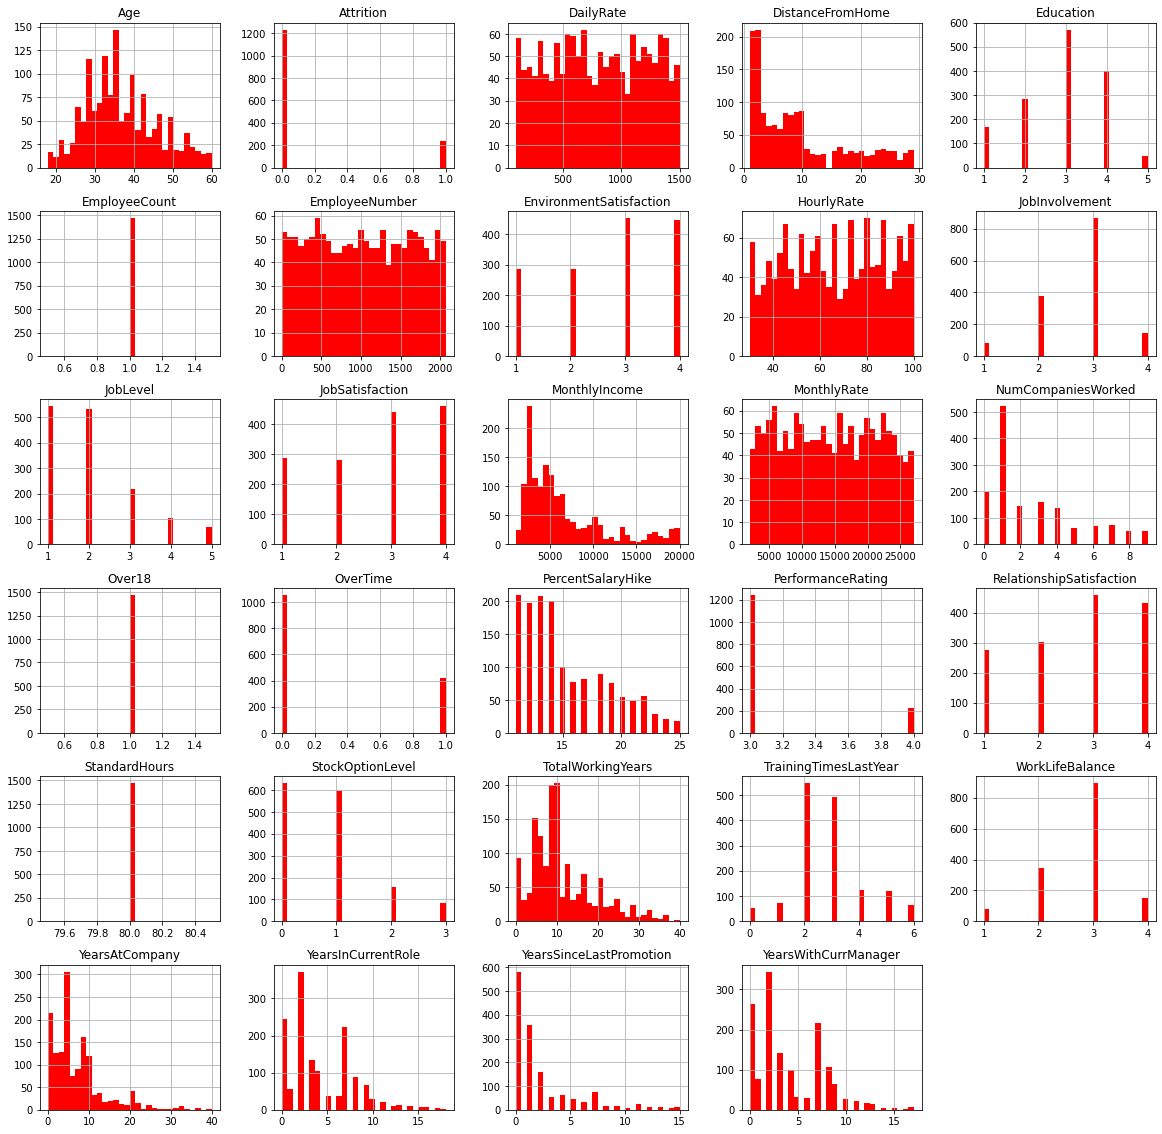

In [9]:
employee_df.hist(bins=30, figsize=(20,20), color='r' )
    #bins=30 := cada histograma será dividido en 30 segmentos, cada uno con la misma amplitud
    #figsize=(20,20) := para que todos los histogramas salgan del mismo tamaño
    #color='r' := color rojo

    #Resultado:
        #Age:= la gran mayoria de empleados se encuentran entre los 30 y los 40 años
        #Attrition := es basicamente la categoría que buscamos predecir, nos dice que: de los 1469 empleados, 
        #             aproximadamente 1200 no abandonan la empresa. Solo 140 empleados abandonan la empresa.
        #             Esto significa, que aproximadamente el 80% de los empleados quieren quedarse en la empresa.
        
        #Hay histogramas que agarran la forma de una "long tail distribution" (tienen una distribución con una cola muy larga), 
        #como: "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", etc. Debido a que es natural por ejemplo, es 
            #"DistanceFromHome" := no todos vivan entre 10 y 20km, o mas de 20km
            #"MonthlyIncome" := no todos ganen entre $5000 y $10000 mensuales, o mas de $10000
            #"TotalWorkingYears" := no todos tengan entre 10 y 20 años trabajando, o mas de 20 años
            #"PercentSalaryHike" := muchas gente tiene un incremente pequeño <15%, poca gente tiene un incremento entre
            #                       el 15% y el 20%, y es raro que una persona tenga un incremento salarial del 25%.

Tiene sentido que nos desagamos de 'EmployeeCount', 'Over18' y 'Standardhours' ya que estos campos no cambian de un empleado a otro, pues son, se podría decir, constantes. Eliminemos 'EmployeeNumber' := el numero de empleado de la empresa,también lo eliminaremos.

In [10]:
employee_df.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis = 1, inplace = True)
    #.drop() := para deshacernos de los campos que no nos interesa. Deben ir entre corchetes.
    #axis=1 := para que se eliminen las columnas que pertenecen a estas caracteristicas 
    #inplace= True := hace el cambio en el propio objeto de memoria, sin necesidar de crear otro dataframe que almacene
    #                 la nueva data
    
    #OBSERVACION: no correr mas de una vez esta misma celda, porque como ya se corre un vez, Python ejecuta lo pedido
    #             y al correr otra vez, ya no encuentra tales caracteristicas a reemplazar y por ende saldrá ERROR.

vemos entonces que en efecto, se ha reducido la dimension eliminando esas variables que no aportaban al análisis y se ha sobreescrito el propio objeto `employee_df`, ahorrando memoria en nuestro PC

In [11]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Veamos cuantos empleados dejan la compañía y cuantos se quedan en la empresa. Para ello vamos a crear dos datframes a partir del original

In [12]:
#Dataframe de los que se marchan
left_df = employee_df[employee_df['Attrition']==1]
	# del "employee_df" me quedo con todas las observaciones donde "Attrition" sea 1

#Dataframe de los que se quedan
stayed_df= employee_df[employee_df['Attrition']==0]

Veamos el número de empleados que se quedaron y que se fueron, expresado también en porcentajes

In [13]:
#Mostramos el Total de empleados
print("Total = ", len(employee_df))
    #len() := muestra la longitud del dataframe "employee_df"

    
#Número de empleados que dejan la empresa
print("Número de empleados que dejan la empresa = ", len(left_df))
    #Otra forma:
        #print(np.count_nonzero(left_df['Attrition']))
print("Porcentaje de empleados que dejan la empresa = ", 1.*len(left_df)/len(employee_df)*100.0, "%")
    #1. := como son numeros enteros, con esto puedo sacar los decimales, es decir, transforma el #entero a #real
    #*100.0 := multiplico por esto, para obtener un porcentaje
    
    
#Número de empleados que permanecen en la empresa  
print("Número de empleados que permanecen en la empresa = ", len(stayed_df))
print("Porcentaje de empleados que se quedan en la empresa = ", 1.*len(stayed_df)/len(employee_df)*100.0, "%")

Total =  1470
Número de empleados que dejan la empresa =  237
Porcentaje de empleados que dejan la empresa =  16.122448979591837 %
Número de empleados que permanecen en la empresa =  1233
Porcentaje de empleados que se quedan en la empresa =  83.87755102040816 %


Ahora que tengo el porcentaje de empleados que se quedan o se marchan, veamos que características tienen estos empleados 

In [14]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [15]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


**Resultados:**
- age := la edad media de los empleados que se quedaron es mayor en comparación con los que se fueron
- DailyRate := El rate diario de los empleados que se quedaron es mayor
- DistanceFromHome := Los empleados que se quedan viven más cerca del trabajo
- EnvironmentSatisfaction & JobSatisfaction := Los empleados que se quedan están en general más satisfechos con sus trabajos
- StockOptionLevel := las acciones de la empresa; los empleados que se quedan tienen un mayor nivel de stocks options

Ahora, vamos a estudiar las diferentes correlaciones que existen entre las variables. Nos interesa saber cuales son las variables que estén positivamente correlacionadas, es decir, que haya una fuerte relación entre ellas. Como tenemos muchas variables, la mejor forma de ver las correlaciones es usando un mapa de calor

In [16]:
correlaciones = employee_df.corr()

En vez de ver la matriz como tal, porque va a salir muchos numeros, se recomienda crear $f$ para la figura y $ax$ para el eje o axis, igual a una figura grande de 20 $x$ 20

<AxesSubplot:>

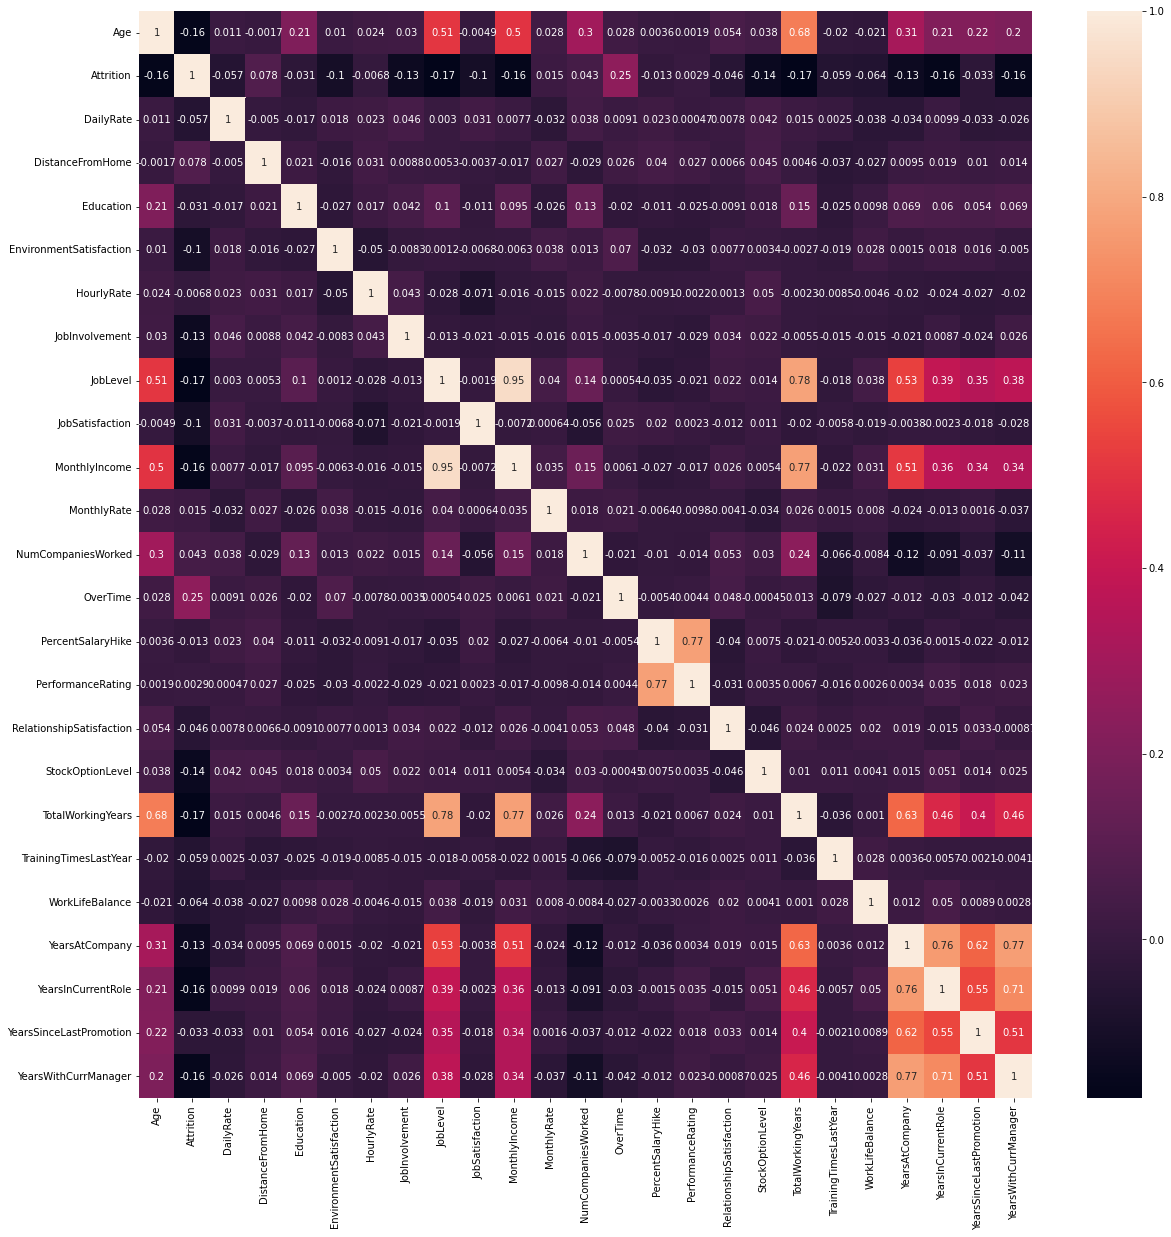

In [17]:
f, ax = plt.subplots(figsize = (20,20))

#Finalmente, pintamos el mapa de calor 
sns.heatmap(correlaciones, annot=True)
    #sns.heatmap():= pinta las "correlaciones"
    #annot=True := añadimos el campo de notaciones

**Resultados:** el color mas clarito, representa la maxima correlación = 1, y miestras mas oscuro, representa menos correlación
- "Job level" tiene una correlacion de 0.95 con "MonthlyIncome" y 0.78 con "TotalWorkingYears"
    - cuanto mas años lleva en la empresa, mayor es el cargo o nivel que ocupa en el trabajo
- "TotalWorkingYears" tiene una correlacion de 0.77 con "MonthlyIncome"
    - cuanto mas años de experiencia, mayor va a ser tus ingresos mensuales
- "YearAtCompany" tiene una correlación de 0.63 con "TotalWorkingYears"
    - cuantos mas años lleves trabajando, mas años tambien llevas en la compañía, esto quiere decir, que es una empresa solida
- "Job level" está altamente correlacionado con el número total de horas de trabajo
- "Monthly income" está altamente correlacionado con "Job level"
- "Monthly income" está altamente correlacionado con el número total de horas de trabajo
- "Age" está altamente correlacionado con los ingresos mensuales 

Notemos también que existen correlaciones que muestras relacione smuy obvias y que por tanto no aportan información relevante, como por ejemplo, cuanto mas años tienes en tu puesto "YearsCurrentRole", mas años tienes en la compañía "YearsAtCompany". 

Vamos a comparar las distribuciones de las variables que considero son cruciales para estudiar si el individuo abandona o no la empresa. En vez de usar la función `.describe()` vamos a analizarlas de manera visual.

<AxesSubplot:xlabel='Age', ylabel='count'>

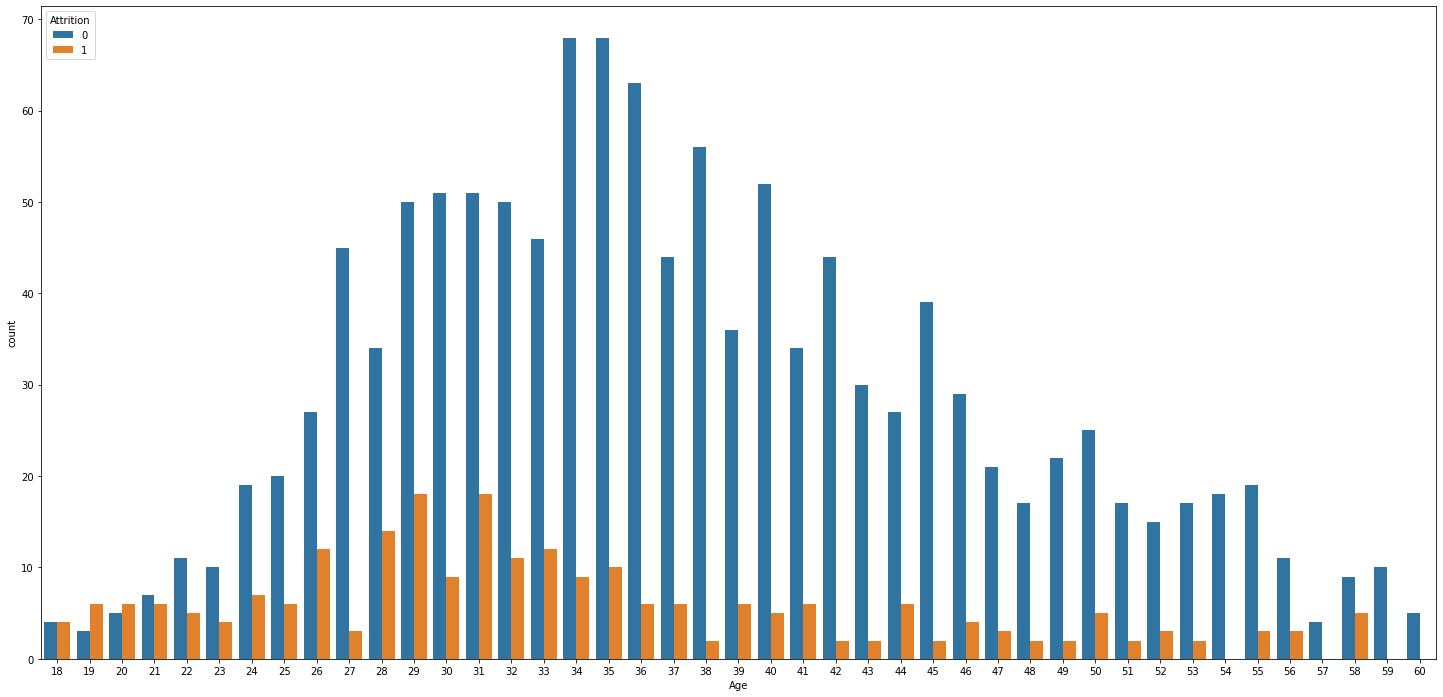

In [18]:
#Edad en funcion de "Attrition"
    #Obejetivo: ¿si las personas que abandonan la empresa lo hacen a determinadas edades mas que a otras?
plt.figure(figsize=[25,12])
    #plt.figure() :=, para empezar un nuevo dibujo
    #figsize=[25,12] := de tamaño 25 de alto y 12 de ancho
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)
    #sns.countplot():= un plot del conteo, es decir, del numero de usuarios que caen en cada categoría
    #Le paso los atributos:
        #x := la edad
        #hue := el color en el grafico va a depender de "Attrition", en este caso, solo va haber 2 colores
        #       uno para los que se quedan en la empresa 1, y otro para los que no 0.
        #data := nuestro dataset es "employee_df"

**Resultados:**
- Tenemos una distribución bastante interesante, como vemos el rango de edad va desde lo 18 años hasta los 60 años.
- Naranja para los que abandonan la empresa, y azul para lo que se quedan en la empresa
- Si vemos el color naranja, notamos que entre lo 28-33 años es el abandono masivo por así decirlo. Además en el eje y, nos indica que son entorno a 20 empleados que abandonan la empresa, en comparación a los 50 que se quedan, representa aún así un porcentaje bastanto alto.
    - **Razón:** puede que muchos ya quieran formar un hogar, y por ende estén buscando un trabajo con mas ingresos
- Si nos fijamos en los más jovenes, no hay mucha diferencia entre los que abandonan y se quedan. 
- Si nos fijamos en los más mayores, no hay mucho abandono, por ejemplo por los 60 años nadie abandona la empresa
    - **Razón:** jubilación

Este gráfico puedo hacerlo para otros parámetros, todo lo que sea categoría sirve, por ejemplo, ¿cómo se distribuye la relacion de la gente que se va y se queda, por rol que desempeña en el empresa?, por estado marital?, etc.

Usando la misma función `sns.countplot()` pero enfocandonos al resto de variables.

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

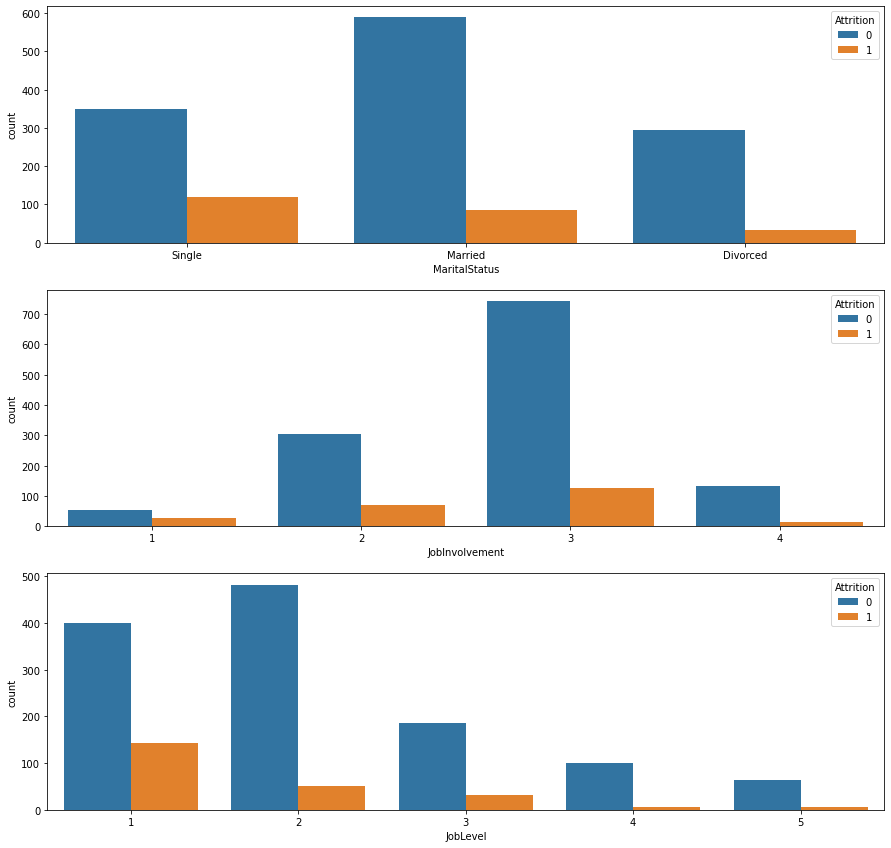

In [19]:
plt.figure(figsize=[15,20])
    #empezamos una figura de 10 ancho x 20 alto

#GRAFICO DE CUATRO FILAS Y UNA COLUMNA
# plt.subplot(411) #subplot(411) := indica que en 4 filas y 1 columna, estoy pintando el 1er gráfico 
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)


**Resultados:** 1er gráfico 'JobRole' vs 'Attrition'
- Notemos que en el departamento de ventas, "Sales Representative", se quedan tantos como se van. Dice que en torno a 50 personas quedan en Ventas, pero como 40 se han ido. Esto quiere decir, que mas de la mitad de ese departamento abandona la empresa. Por tanto, los representantes de ventas tienden a irse en comparación con cualquier otro trabajo.
- Notemos que en el rol de "Laboratory Technician", hay muchos tecnicos de laboratorio que abandonan la empresa, en torno a 60 personas. Aunque se queden 240 empleados, si es significativo porque a comparación del rol "Research Director" donde 1 o 2 directores se van, pero quedan mas de 50 o 60. Por tanto, este último representa un puesto más seguro para que un empleado que quede. 

**Resultados:** 2do gráfico 'MaritalStatus' vs 'Attrition'
- De los 350 solteros que hay en la empresa, en torno a 100 la abandonan, lo cual representa un porcentaje muy superior a comparación de casados o divorciados que hay en la empresa. Por tanto, los empleados solteros tienden a irse en comparación con los casados y divorciados.

**Resultados:** 3er gráfico 'JobInvolvement' vs 'Attrition'
- Cuanto se involucra en el trabajo: del 1 al 4
    - la gente que apenas está involucrada en la empresa, 1, les da casi igual, quedarse que irse
    - a partir de 2, cuanto mayor es la involucracion de los empleados, menos es la posibilidad de que se vayan
  
  Por tanto, los empleados menos involucrados tienden a dejar la empresa.

**Resultados:** 4to gráfico 'JobLevel' vs 'Attrition'
- El trabajo que desempeñan: 1 becario, 2 junior, 3 senior, 4 manager
    - de 400 becarios, en torno a 150 empleados deciden marcharse, lo cual es una taza bastante alta
         - **Razon:** si tienes un JobLevel de 1, la involucracion es baja, por tanto es normal que a menor puesto de trabajo es mas fácil que abandones.
  
  Por tanto, los menos experimentados (nivel laboral bajo) tienden a dejar la empresa que un senior, por ejemplo.

El estudiar estas tendencias de cuando un empleado abandona la empresa, nos da mucha información de cómo es que estos usuarios abandonan la empresa, es decir, cuales podrían ser las razones más directas. 

### Gráficos Kernel Density Estimation

En estadística, la estimación de la densidad del núcleo (KDE) es una forma no paramétrica de estimar la función de densidad de probabilidad de una variable aleatoria. La estimación de la densidad del núcleo es el proceso de estimar una función de densidad de probabilidad desconocida utilizando una función del núcleo.

En resumen, sirven para estudiar la función de probabilidad de una variable continua.

**1ra variable continua**

Analicemos la distribución de la variable "DistanceFromHome" para compararla con los que se van o quedan de la empresa.

Text(0.5, 0, 'Distancia desde Casa al Trabajo')

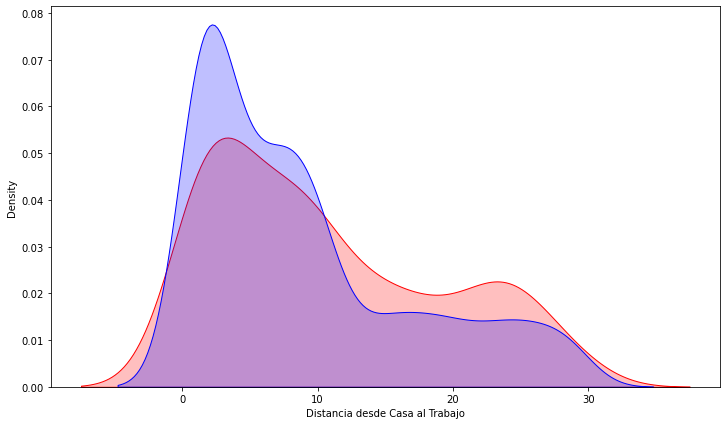

In [20]:
plt.figure(figsize=(12, 7))
    #empezamos una nueva figura de 12 ancho x 7 alto

#Con los que se van de la empresa
sns.kdeplot(left_df['DistanceFromHome'], label = "Empleados que se marchan", shade = True, color = 'r')
    #sns.kdeplot() := del paquete "seaborn" usamos la función ".kdeplot()" que es la función Kernel Density Estimation 
    #shade := para que el color quede semi-transparente
    #r := color rojo, que representa peligro, es decir, empleados que se van
    
#Con los que se quedan en la empresa
sns.kdeplot(stayed_df['DistanceFromHome'], label = "Empleados que se quedan", shade = True, color = 'b')
    #b:= color blue, empleados que se quedan

plt.xlabel('Distancia desde Casa al Trabajo')
    #etiqueta en el eje x

**Resultado:**
- el gráfico es una perspectiva del análisis de la densidad ESTIMADA de la probabilidad
- Lo que debemos de entender es: ¿Que tan probable es que haya empleados que pertenezcan al grupo de 0-10km, 10-20km, 20-30km de distrancia al trabajo? y ver si es mas probable que se marche o no
- Notemos entonces, que la gene mas alejada de casa (>11km), la distribucion de los que se marchan (rojo) está por encima de los que se quedan (azul), y por tanto, puede existir una correlacion entre "DistanceFromHome" con el hecho de que se marche o se quede.

**2da variable continua**

Analicemos ahora la distribución de la variable "YearsWithCurrManager" (número de años con el Manager actual) para compararla con los que se van o quedan de la empresa.

Text(0.5, 0, 'Años con su Manager Actual')

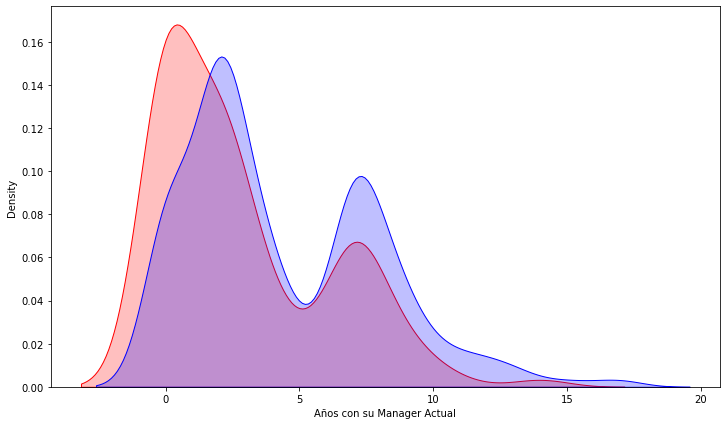

In [21]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = "Empleados que se quedan", shade = True, color = 'b')

plt.xlabel('Años con su Manager Actual')

**Resultados:**
- hay dos montañas para ambos tipo: se van, se quedan, a esta se la llama "distribucion bimodal"
- si el número de años con el Manager es menor, la curva que destaca es rojo, esto significa que, los empleados si llevan poco tiempo con el manager les es mas fácil irse que quedarse. 
- a medida que incrementa los años con el Maneger, la curva azul predomina, notemos que de 5 años en adeltante, los empleados tienden a quedarse en la compañía por la comunicación laboral que obviamente se habrá desarrollado.

**3ra variable continua**

Analicemos ahora la distribución de la variable "TotalWorkingYears" para compararla con los que se van o quedan de la empresa.

Text(0.5, 0, 'Número total de años de Trabajo')

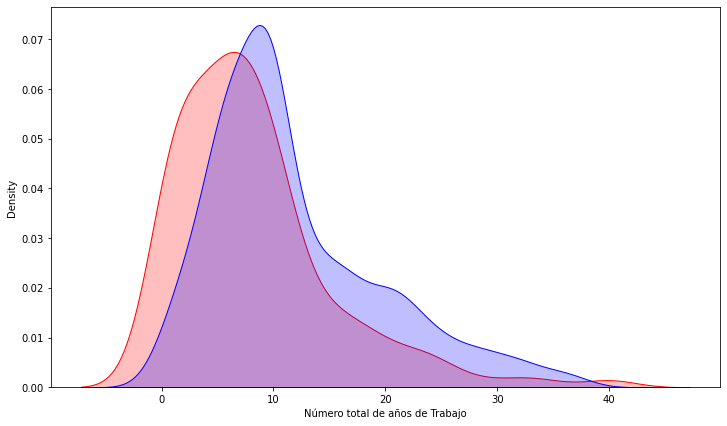

In [22]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['TotalWorkingYears'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = "Empleados que se quedan", shade = True, color = 'b')

plt.xlabel('Número total de años de Trabajo')


**Resultados:**
- los empleados que se quedan, curva azul, tienden a ser los que llevan mas años trabajando en la empresa, a partir de los 6-7 años trabajando se nota esta tendencia

### Gráficos Box plots

Vamos a analizar el ingreso segun el género

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

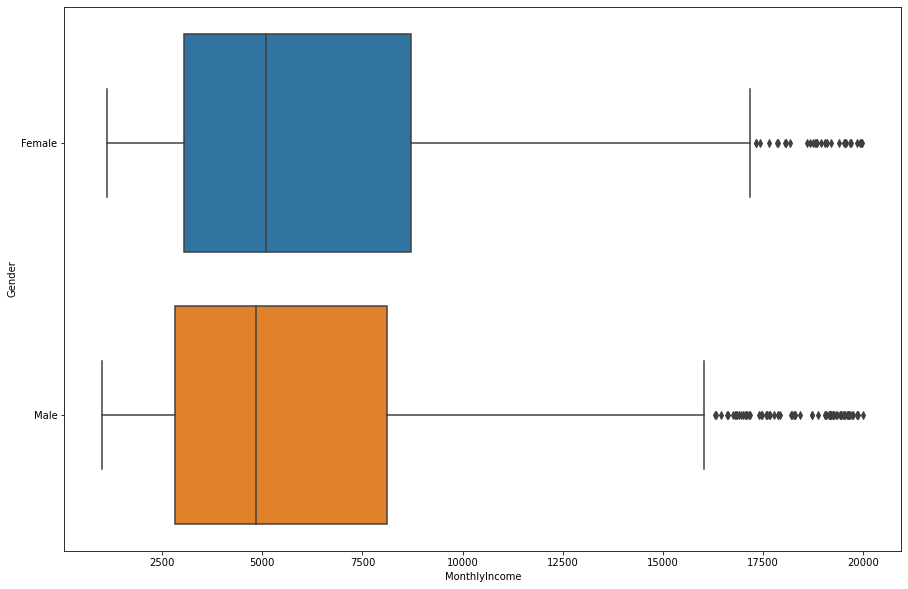

In [23]:
# Veamos el Gender vs. Monthly Income
plt.figure(figsize=(15, 10))
    #empezamos una nueva figura de 15 ancho x 12 alto
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)
    #sns.boxplot() := del paquete "seaborn", la función ".boxplot()" disbuja un diagrama de caja
        #x := el eje numerico es "MonthlyIncome"
        #y := el eje CATEGORICO es "Gender"

**Resultados:**
- notamos que no hay ningún tipo de discriminación respecto al género, en cuanto al ingreso mensual
- la mediana (rayita) de lo que ganan las mujeres, está por encima de la mediana de lo que ganan los hombres
- si nos fijamos en la caja, el 75% tiene un sueldo superior al del 75% de los hombres, es decir, el 3er quartil de los ingresos de las mujeres está por encima del 3er quartil de ingreso de los hombres, $500 o $600 por encima. 
- hay outliers, en ambos géneros

Vamos a analizar el ingreso según el rol que desempeña en la empresa

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

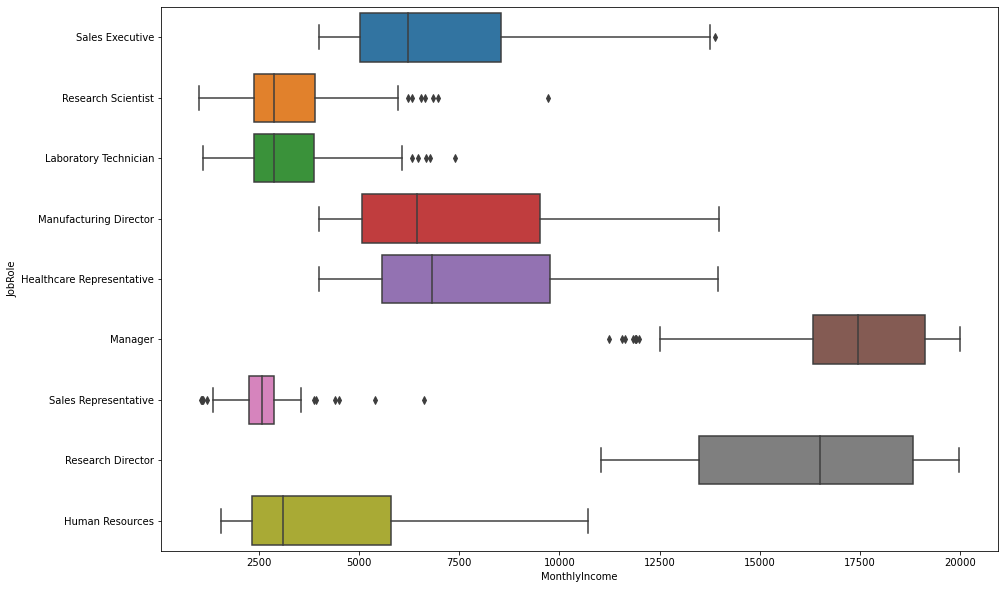

In [24]:
# Veamos el monthly income vs. job role
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)
    #no olvidar que y es CATEGORICO

**Resultados:**
- la gente que gana mas dinero son los Manager, una media de $\$$17000, lo cual es obvio porque tienen mayor responsabilidad
- los directores de investigación, también ganan bien, como la caja es mas amplia, significa que hay muchas mas variedad en los sueldos
- por tanto, "Manager" y "Research Director" son los dos roles mejor pagados
- los roles de "Research Scientist" y "Laboratory Technician" están bastante mal pagados en comparacion al resto de la empresa, al igual que el rol de "Sales Representative" salvo algunos **outliers** que serían algunitos que ganan bien

# TAREA 3: ORGANIZACIÓN y ESCALAMIENTO DE DATOS

Vamos a limpiar las variables respecto a su naturaleza, hay variables que son categóritca y las vamos a separar del resto de variables que son numéricas

**1. Separamos las variables categóricas**

In [25]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
    #[[]] := porque le paso la lista de lo que van a ser las 6 variables categóricas que tenemos en nuestro dataset
    
#Imprimimos
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


ahora que tengo estas 6 variables categóricas, vamos a suministrarlas a un modelo de Machine Learning (ML), como un modelo ML de estos no entiende de categorías sino de números, vamos a aplicar una transformación para convertir esta información (categorías que entiende un humano) a ser variables numéricas (que pueda entender un modelo ML).

De `sklearn.preprocessing` utilizaremos la librería `OneHotEncoder` para hacer estas transformaciones cuya funcion `OneHotEncoder()` es capaz de codificar los datos por nosotros.

**OBS:** si sale error al ejecutar la siguiente linea, en Terminal escribir `pip install sklearn`

In [26]:
from sklearn.preprocessing import OneHotEncoder

#Empezamos la transformacion
#1. Creamos un objeto
onehotencoder = OneHotEncoder()
    #OneHotEncoder() := crea tantas columnas como diferentes variables aparezcan en "X_cat"
        #Ej: variable "Gender" aparecerá dos columnas: Female y Male, poniendo 1 o 0 si es o no femenino o masculino

#2. Sobreescribirmos la variable X_cat, con la transformacion hecha por el objeto "onehotencoder"
X_cat = onehotencoder.fit_transform(X_cat).toarray()
    #fit_:= decide cuales son los 0 y 1 para los datos
    #transform() := aplica la transformacion a la variable X_cat
    #.toarray() := finalmente, transformo todo a formato array

veamos cual es el tamaño del array que acabamos de construir

In [27]:
X_cat.shape
    #1470 filas
    #26 columnas

(1470, 26)

ahora, lo que nos interesa es que `X_cat` sea un dataframe

In [28]:
#Sobreescribimos en la propia variable
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


por tanto, las categorías han quedado CODIFICADAS con 0s y 1s lo cual significa que se ha podido transformar TODO lo que era CATEGORÍA a NUMERO.

**2. Separamos las variables numéricas**

In [29]:
#Escribimos todas las variables numericas que me interese tener disponibles
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
    # Notemos que hemos elminado la columna target, 'Atrittion', porque es la columna que queremos predecir

#Imprimimos
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


ahora, como tenemos dos dataframes pero con información compartida, vamos a juntarlas

In [30]:
#Unimos los dos dataframes y lo llamamos "X_all"
X_all = pd.concat([X_cat, X_numerical], axis = 1)
    #pd.concat() := de la libreria "pandas", la función ".concat()" concatena a los elementos "X_cat" y "X_numerical"
        #axis = 1 := como coincide el numero de filas (1470) el eje de union son las filas

#Imprimimos
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


tenemos entonces, un dataframe con 1470 filas y 50 columnas. El siguiente paso, es el escalado de nuestros datos especialmente antes de suministrar la información de entrenamiento a una red neuronal artificial, para ello vamos a usar la librería `MinMaxScaler` y junto con la función `MinMaxScaler()` lo haremos automáticamente.

## Escalamiento de datos

**¿Por qué necesitamos hacer este escalado de datos?** porque si no lo hicieramos, fijemonos que hay unas variables que me mueven en el orden de los miles, como podría ser el sueldo diario "DailyRate", o "MontlyIncome", así mismo hay otras variables como la distancia de casa al trabajo "DistanceFromHome" que apenas son de 5, 10, o 20, que sabemos que son kilómetros. Entonces, si suministramos estos datos sin ser escalados las variables de gran valor como las nombradas anteriormente, tomarían el control por encima de resto y los modelos ML infravalorarían el poder o importancia de las otras variables "mas chicas".

In [31]:
from sklearn.preprocessing import MinMaxScaler

#1. Creamos un objeto
scaler = MinMaxScaler()

#2. Definimos el conjunto de variables independientes o de caracteristicas X
X = scaler.fit_transform(X_all)
    #scaler. := aplicando el objeto que se va a encargar de la tranformacion
    #.fit := para conocer cuanto debe escalar CADA columna
    #_transform := para aplicarlo a "X_all" 

C:\anacoda2020\envs\EstadescripPython\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\anacoda2020\envs\EstadescripPython\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


veamos los valores de nuestra nueva variable `X`

In [32]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

tenemos una gran cantidad de números, todos ellos dentro del rango 0 y 1, todo esto gracias a `MinMaxScaler()` donde 0 es el `min` y 1 es el `max`

Se le ha llamado `X` porque ese va a ser la entrada's del modelo ML, es decir, las variables independientes. Otra vez, notar que como `Attrition` es la variable que quiero predecir, esta no puede formar parte de las variables independientes o de la matriz de caracteristicas, como se le conoce. Esta variable debe ir a parte.

Vamos a definir el vector de predicciones, es decir, la variable dependiente, la cual debe ser única, ya que vamos a predecir SOLO una variable. 

In [33]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

**OBS:** si tuviesemos que predecir dos variables, deberíamos de hacer dos modelos, para predecirlos respectivamente.

**NOTEMOS:** que la `X` es la variable para entrenar el modelo y `y` es la variable para hacer el testing.

# TAREA 4: ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO REGRESIÓN LOGÍSTICA

Vamos a ver como aplicar la Tarea 5 y Tarea 6 en nuestro caso práctico

In [34]:
from sklearn.model_selection import train_test_split
    #import train_test_split := importamos la funcion "train_test_split" para dividir la data en un conjunto de entrenamiento y
    #                           en un cojunto de validacion; 75% y 25% respectivamente.
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    #X_train, X_test, y_train, y_test := como los resultados que devuelve la funcion "train_test_split"
    #X := aplicada a la matriz de caracteristicas X
    #y := el vector de predicciones
    #test_size = 0.25 := el 25% de los datos se usaran para la validación "testing", y los otros 75%  el entrenamiento

In [35]:
X_train.shape
    #1102 filas 
    #50 columnas
    
    #Es decir, tenemos 1102 observaciones con 50 variables cada una de ellas para crear el modelo, es decir, para la fase de 
    #entrenamiento. 

(1102, 50)

In [36]:
X_test.shape
    #368 filas 
    #50 columnas
    
    #Es decir, tenemos 368 observaciones con 50 variables cada una de ellas para crear la validacion del modelo, es decir,
    #para la fase de testing. 

(368, 50)

Vamos a crear el modelo con las 1102 observaciones, es decir, el modelo aprenderá de estas observaciones, ajustará los parámetros del mismo y luego veremos si con datos que no han sido suministrados en el modelo se obtiene o no resultados igual de buenos. 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
    #import LogisticRegression := importando el modelo de regresion logistica
    #import accuracy_score := importamos la funcion "accuracy_score" para poder obtener la tasa de acierto

#CREAMOS EL MODELO DE REGRESION LOGISTICA

#1.Creamos el modelo
#Primero creamos el objeto que almacena el modelo a usar
model = LogisticRegression()
#Segundo ajustamos los pesos o valores del modelo a los datos del conjunto de entrenamiento 
model.fit(X_train, y_train)
    #.fit(X_train, y_train) := se ajusta con la variable independiente "X_train" para intendar predecir el "y_train"
    #con el modelo de regresion logistica
    
    #Entrenamos el modelo con nuestros datos.

#2.Realizamos la prediccion
y_pred = model.predict(X_test)
    #.predict(X_test) := se realiza una prediccion en base a la variable "X_test" 
    
    #Le paso datos del testing, es decir, datos que no han sido utilizados para crear el modelo para hacer predicciones
    #y ver si el modelo se comporta bien, incluso con esos datos que NUNCA se le han dado al modelo para entrenar. 

In [38]:
#Imprimimos la prediccion
y_pred
    #Resultado
        #1 := ese empleado abandona la empresa
        #0 := ese empleado no abandona la empresa

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

para poder comparar si este modelo da buenas predicciones y ver si es mejor o no que los otros, debemos utilizar alguna de las métricas que comentamos, KPIs.

**Resultados en el Conjunto de Testing**

In [39]:
#Importamos las librerias para poder obtener la Matriz de confusion y el Clasificador de Regresion Logistica
from sklearn.metrics import confusion_matrix, classification_report
    #import confusion_matrix, classification_report 

In [40]:
#Primero: imprimimos la tasa de acierto
print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))
    #.format() := utilizando esta funcion para formatear que dentro del () me escriba 100 por el resultado de la funcion
    #             "accuracy_score()" aplicado a la prediccion del modelo "y_pred" comparado con las variables que inicialmente
    #              se intentaba predecir, es decir, con "y_test"
    
    #Resultado:
        #nuestro algoritmo tiene una tasa de acierto del 88%, es decir, de cada 100 observaciones 88 de ellas son clasificadas
        #correctamente por parte de nuestro modelo.

Accuracy 92.11956521739131 %


Recordar que si queremos evaluar que este modelo de prediccion es bueno, debemos evaluar los otros estadísticos

In [41]:
#Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
    # y_test, y_pred := aplicada primero al "y verdadero" y luego al "y prediccion"

<AxesSubplot:>

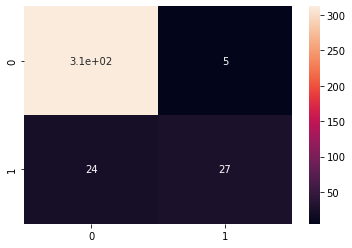

In [42]:
#Realizamos un mapa de calor a partir de la matriz de confusion
sns.heatmap(cm, annot=True)
    #annot=True := para que me describa la categorias y cuantas observaciones caen en cada una de ellas
    
    #Resultados:
        #El modelo clasifica mas de 310 empleados como TRUE-NEGATIVE, es decir, no abandonan la empresa
        #El modelo clasifica 26 empleados como TRUE-POSITIVE, es decir, si abandonan la empresa
        #8 como FALSE-NEGATIVE
        #33 como FALSE-POSITIVE

vamos a ver que nos dice el reporte de Clasificación,

In [43]:
#Imprimimos los estadístico
print(classification_report(y_test, y_pred))
    #classification_report() := con ayuda de esta función se imprime directamente los estadísticos

    #Resultados:
        #el modelo consigue una precision del 90% en la clase 0
        #el modelo consigue una precision del 76% en la clase 1
        
        #el recall es del 97% en la clase 0
        #el recall es del 44% en la clase 1, lo que es bastante malo
        #Entonces, este es uno de los 1ros estadisticos a centrarnos para poder mejorarlo, usando Random Forest o redes
        #neuronales artificiales
        
        #lo mismo para f1-score

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       317
           1       0.84      0.53      0.65        51

    accuracy                           0.92       368
   macro avg       0.89      0.76      0.80       368
weighted avg       0.92      0.92      0.91       368



Por tanto, esto es básicamente el Modelo de Regresión Logística y los estadísticos derivados de el para entender y evaluar la calidad del modelo. 

# TAREA 5: ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

En la anterior sección se ha entrenado y evaludado un modelo de regresión logístico para clasificar, y además se ha conseguido un Accuracy del 88%, pero no se conseguía un buen resultado en `recall` y `f1-score` para la categoría 1. Además como vimos, el número de FALSOS-POSITIVOS era bastante alto como para considerarlo un bueno modelo.

Vamos a ver si con los **Bosques Aleatorios** conseguimos un mejor resultado.

In [44]:
from sklearn.ensemble import RandomForestClassifier
    #import RandomForestClassifier := importamos la funcion "RandomForestClassifier" para poder clasificar usando Bosques 
    #                                 aleatorios

#CREAMOS EL MODELO DE BOSQUES ALEATORIOS

#1.Creamos el modelo
#Primero creamos el objeto que almacena el modelo a usar
model = RandomForestClassifier()
#Segundo ajustamos los pesos o valores del modelo a los datos del conjunto de entrenamiento 
model.fit(X_train, y_train)
    #.fit(X_train, y_train) := se ajusta con la variable independiente "X_train" para intendar predecir el "y_train"
    #con el modelo de Bosques aleatorios
    
    #Entrenamos el modelo con nuestros datos.
    
#2.Realizamos la prediccion
y_pred = model.predict(X_test)
    #.predict(X_test) := se realiza una prediccion en base a la variable "X_test" 
    
    #Le paso datos del testing, es decir, datos que no han sido utilizados para crear el modelo para hacer predicciones
    #y ver si el modelo se comporta bien, incluso con esos datos que NUNCA se le han dado al modelo para entrenar.

In [45]:
#Imprimimos la prediccion
y_pred
    #Resultado
        #1 := ese empleado abandona la empresa
        #0 := ese empleado no abandona la empresa

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

para poder comparar si este modelo da buenas predicciones y ver si es mejor o no que los otros, debemos utilizar alguna de las métricas que comentamos, KPIs.

Como el la línea [35] ya se importo `from sklearn.metrics import confusion_matrix`, tan solo usamos la función "confusion_matrix()".

**Resultados en el Conjunto de Testing**

In [46]:
#Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
    # y_test, y_pred := aplicada primero al "y verdadero" y luego al "y predicción"

<AxesSubplot:>

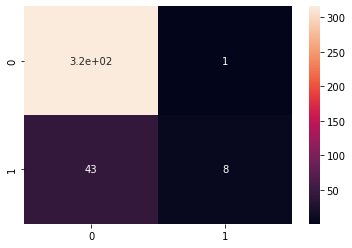

In [47]:
#Realizamos un mapa de calor a partir de la matriz de confusión
sns.heatmap(cm, annot=True)
    #annot=True := para que me describa la categorías y cuantas observaciones caen en cada una de ellas
    
    #Resultados:
        #El modelo clasifica mas de 3100 empleados como TRUE-NEGATIVE, es decir, no abandonan la empresa
        #El modelo clasifica 10 empleados como TRUE-POSITIVE, es decir, si abandonan la empresa
        #1 como FALSE-NEGATIVE
        #44 como FALSE-POSITIVE

Veamos el reporte de clasificación; veamos si conseguimos mejores resultados que antes:

In [48]:
#Imprimimos los estadístico
print(classification_report(y_test, y_pred))
    #classification_report() := con ayuda de esta función se imprime directamente los estadísticos

    #Resultados:
        #el modelo consigue una precision del 88% en la clase 0
        #el modelo consigue una precision del 91% en la clase 1
        
        #el recall es del 100% en la clase 0;  pues como vemos solo se ha equivocado en 1 de las 3100 observaciones
        #el recall es del 19% en la clase 1; solo hemos predicho que 10 en efecto han dejado la empresa; lo que es bastante malo
        #Entonces, este es uno de los 1ros estadisticos a centrarnos para poder mejorarlo como ya estamos usando Random Forest
        #nos quedaría por usar redes neuronales artificiales (o Deep Learning).
        
        #lo mismo para f1-score
            #93% para la categoria 0; poder detectar cuando un empleado NO abandonará; lo cual esta muy bien
            #31% para la categoria 1; poder detectar cuando un empleado SI abandonará; lo cual no se ve muy bien

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       317
           1       0.89      0.16      0.27        51

    accuracy                           0.88       368
   macro avg       0.88      0.58      0.60       368
weighted avg       0.88      0.88      0.84       368



# TAREA 6: ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO DEEP LEARNING

Vamos a entrenar el modelo de Depp Learning o Red Neuronal Artificial y ver que conseguimos, para esto vamos a necesitar de una librería `tensorflow`

In [49]:
import tensorflow as tf
    #tensorflow := sirve para entrenar modelos de inteligencia artificial 

en particular, vamos a usar una "sublibreria" de `tensorflow` llamada `keras`, esta lo que va a hacer es definir una arquitectura (lo que le va a ocurrir al modelo, es que va a ser secuencial, es decir, modelo de capa tras capa *modelo de red neuronal profunda*),

In [50]:
#Para construir el modelo secuencial

#1. Incializamos el modelo como instancia de la clase SEQUENTIAL del tensorflow.keras.models
model = tf.keras.models.Sequential()
    #invoco a tensorflow.keras
    #de ahi accedo a la libreria "models"
    #dentro de "models" voy a crear un modelo secuancial ".Sequential()"

#2.Añadimos al modelo todas las capas que nos interesa hasta completar la arquitectura
#1ra capa: 
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(50, )))
    #model.add(tf.keras.layers.Dense := añadimos la primera capa, la cual es densa "Dense" (porque todas las neuronas de la capa
    #                                   de entrada iran conectadas con las neuronas de la capa oculta)
        #units := numero de neuronas de la 1ra capa oculta
        #activation := funcion de activación (puede ser el "Rectificador Lineal Unitario" o la "Sigmoide"), en este caso
        #              relu = rectificador lineal unitario, para quedarme solo con las correlaciones positivas entre variables
        #input_shape := OBLIGADO EN PONER EN LA 1RA CAPA, este indica que la entrada va a ser vectores con 50 variables,
        #               suministradas en lotes. Como el lote tiene tamaño variable, no lo incorporo.
        #               Es 50, porque ese es el numero de variable que me quedaron luego de codificar todas las variables del
        #               dataset.
#2da capa:    
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
#3ra capa:  
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
#4ta capa: capa de salida 
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))
    #Esta capa de salida solo va a tener 1 sola neurona, y usará la función Sigmoide
    
    #La salida va a ser un valor continuo entre 0 y 1, es decir, una probabilidad, por eso es la razon de colocar una sola 
    #neurona.
    
    #Sé que es una probabilidad porque se establece que la función de activación sea una Sigmoide, por tanto transformará 
    #cualquier valor que salga de la neurona, en un valor entre 0 y 1.

para ver la arquitectura de nuestra red neuronal en mejor detalle, hacemos 

In [51]:
model.summary()
    #Resultado:
        #de la 1ra capa a la 2da; 25mil parámetros
        #de la 2da capa a la 3ra; 250mil parámetros
        #de la 3ra capa a la 4ta; 250mil parámetros
        #capa de salida, 501 parámetros
        
        #Por tanto, haciendo la suma tenemos 527001 parámetros, es decir, mas de medio millon de parámetros que debe entrenar
        #esta red neuronal.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


una vez que se tiene la arquitectura, lo que se hace es; compilar el modelo indicando el optimizador que se va a usar, típicamente alguna variante del gradiente descendente como es el optimizador de Adam y la función de pérdidas que utilizaremos para medir el error

In [52]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])
    #se compile utilizando como optimizador 'Adam'
    #loss := la función que medirá el error (la función de pérdidas) será "binary_crossentropy", la entropía cruzada binaria 
    #        porque es un problema de clasificación binario
    #metrics := accuracy = precision o acierto, esto me sirve para poder observar a cada paso del entrenamiento cómo se va 
    #           modificando o cómo se va mejorando la precisión en el acierto.

Finalmente, una vez que lo tenemos compilado, lo único que hay que hacer es que el modelo ajuste a nuestros datos y esto es lo mismo que antes, es decir,

In [53]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size=50)
    #model.fit(a,b,c,d)
        #a := a base del conjunto "X_train"
        #b := quiero predecir con esta arquitectura de red neuronal, el "y_train"
        #c := voy a entrenar 100 "epochs", es decir, se va a pasar a través del conjunto de entrenamiento un total de 100 veces
        #     por eso tengo el historial de los "epochs" en "epochs_hist", para luego poder representar ese progreso a lo largo 
        #     del tiempo (de todos esos epochs).
        #d:= tamaño del lote, es decir, que se van a entrenar con muestras aleatorias (del conjunto de entrenamiento) de 
        #    tamaño 50.
        
    #Resultado: min 8:18 video 19
        #Notemos que al inicio del modelo, ya empieza con un 82.4% de precision
        #Cuando ya se lleva unos 21/100 "epochs" ya acierta un 100%, esto significa que es una red neuronal capaz de acertar
        #cualquiera de los individuos que le hemos suministrado, PERO puede darse el caso que haya memorizado los resultados 
        #y a la hora de hacer la predicción con empleados que no han formado parate del entrenamiento, no nos de un resultado
        #bueno. 

Epoch 1/100
23/23 [==============================] - 6s 20ms/step - loss: 0.4408 - accuracy: 0.8240
Epoch 2/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3778 - accuracy: 0.8530
Epoch 3/100
23/23 [==============================] - 0s 10ms/step - loss: 0.3353 - accuracy: 0.8675
Epoch 4/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2993 - accuracy: 0.8857
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3001 - accuracy: 0.8793
Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3045 - accuracy: 0.8802
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2597 - accuracy: 0.9038
Epoch 8/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2083 - accuracy: 0.9256
Epoch 9/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1721 - accuracy: 0.9310
Epoch 10/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1672 - accuracy: 0.9401
Epoc

Epoch 80/100
23/23 [==============================] - 0s 9ms/step - loss: 8.8258e-06 - accuracy: 1.0000
Epoch 81/100
23/23 [==============================] - 0s 9ms/step - loss: 8.5020e-06 - accuracy: 1.0000
Epoch 82/100
23/23 [==============================] - 0s 8ms/step - loss: 8.1003e-06 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 0s 9ms/step - loss: 7.7711e-06 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 0s 9ms/step - loss: 7.4724e-06 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 0s 9ms/step - loss: 7.2097e-06 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 0s 9ms/step - loss: 6.9062e-06 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 0s 9ms/step - loss: 6.6422e-06 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 0s 8ms/step - loss: 6.3968e-06 - accuracy: 1.0000
Epoch 89/100
23/23 [==============================] - 0s 8ms/ste

Por tanto se tomarán 50 muestras, se pasarán por la red neuronal y se dirá que tan bueno es el modelo para predecir el abandono o no del individuo en la empresa.

Veamos la predicción sobre la parte del conjunto que no formó parte del entrenamiento.

In [54]:
y_pred = model.predict(X_test)
y_pred
    #Resultado: 
        #me da las probabilidades de que el individuo abandone o no el trabajo

array([[1.24522379e-10],
       [3.55577984e-10],
       [1.63509188e-08],
       [1.00000000e+00],
       [9.27801794e-11],
       [1.15094538e-10],
       [2.58071949e-12],
       [2.07051976e-09],
       [4.73042755e-16],
       [1.89524137e-13],
       [6.53054826e-07],
       [2.46315988e-12],
       [3.03884073e-09],
       [1.44207386e-13],
       [1.10288056e-07],
       [5.07895770e-09],
       [2.42776306e-08],
       [3.21374771e-09],
       [2.10185262e-05],
       [2.25969819e-15],
       [5.00504811e-11],
       [4.44734560e-08],
       [2.24341830e-11],
       [3.43751907e-03],
       [1.34461720e-09],
       [4.88200147e-09],
       [1.45212721e-06],
       [5.37186516e-15],
       [5.75948976e-11],
       [2.92888285e-06],
       [3.65392994e-11],
       [2.34805429e-06],
       [5.80346127e-09],
       [1.67888709e-06],
       [2.03899873e-07],
       [3.67070697e-06],
       [9.99998689e-01],
       [6.91047728e-01],
       [7.78711851e-08],
       [4.60628513e-08],


Hay probabilidades que o bien son 1, o bien cercanos a 0, u otros que están entre medias. Para ello, elejimos un umbral de decisión: 

In [55]:
#Si la probabilidad de que abandone la emprea supera el 50% la predicción de que abandone la empresa es TRUE, si no FALSE
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

ya tenemos los resultados, ahora podemos compararlos con los valores originales que eran 0s y 1s. Veamos primero una serie de gráficos para ver a través de las "epochs" del entrenamiento como ha ido disminuyendo la perdida y como ha ido mejorando la precisión. 

In [56]:
epochs_hist.history.keys()
    #contiene dos parámetros: la perdida y la precisión

dict_keys(['loss', 'accuracy'])

por tanto, voy a pintar ambos, para ello voy a usar `matplotlib.pyplot` importado como `plt`.

**Función de perdidas**

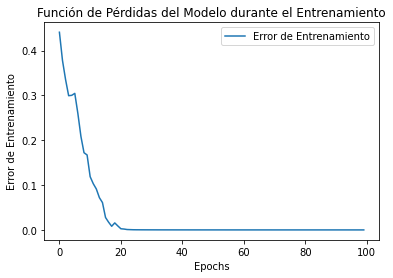

In [57]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])
    
    #Resutado: en el epoch 20 parece que ha incrementado el error, pero a partir de ahí se ha mantenido bajo los errores al 
    #realizar la predicción. Lo cual simboliza que, cuantos más epochs (cuantos mas veces se pasan los datos por nuestra red
    #neuronal) mejor es el modelo, y menos error produce en la clasificación, es decir, la predicción.  

**Función de precisión**

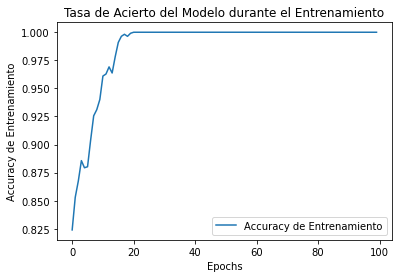

In [58]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

    #Resultado: en concordancia con la idea de arriba, cuando baja el error incrementa el acierto en la predicción del modelo,
    #empezando en un 80% y como ha medida de que vamos entrenando epoch tras epoch, esto se va acercando cada vez más hasta 
    #el 100% de la tasa de aciertos.

Finalmente, vamos a evaluar el modelo usando la matriz de confusión 

<AxesSubplot:>

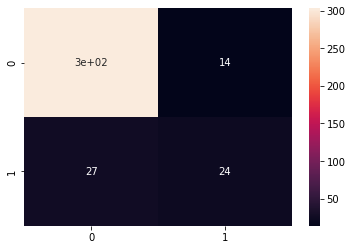

In [59]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
    #le pasamos primero el valor real y luego su prediccion
sns.heatmap(cm, annot=True)
    #pintamos un mapa de calor

volvemos a tener como 300 observaciones correctamente predichas, 24 observaciones de los que abandona la empresa correctamente predichas, 27 falsos positivos y 14 fasos negativos.

Veamos el reporte de clasificación; veamos si conseguimos mejores resultados que antes:

In [61]:
print(classification_report(y_test, y_pred))
    #Resultado:
        #La precisión está en torno al 92% en la categoría 0
        #La precisión está en torno al 63% en la categoría 1
        
        #El recall está en torno al 96% en la categoría 0
        #El recall está en torno al 47% en la categoría 1, tal vez un poco baja
        
        ##El F1-score está en torno al 94% en la categoría 0
        #El F1-score está en torno al 54% en la categoría 1, tal vez un poco baja

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       317
           1       0.63      0.47      0.54        51

    accuracy                           0.89       368
   macro avg       0.77      0.71      0.74       368
weighted avg       0.88      0.89      0.88       368



# Conclusiones:

- Tenemos unos resultados que tal vez no son los mejores mejores mejores del mundo.

- Hemos entrenado tres clasificadores diferentes.
    - El modelo de Deep Learning comparado con el modelo de Arboles Aleatorios y el modelo de Regresión Logistica, tiene un balance mejor equilibrado refiriendonos en que se equivoca TRUE- y FALSE+ casi al apar, porque el de árboles aleatorios tenía muchos más falsos positivos que no negativos y el de regresión logística también tenía más falsos positivos que negativos.
    
Al ser un dataset tan desbalanceado pues hay mucha más gente que se queda, que la que se marcha. Podríamos intentar incrementar el número de muestras de los empleados que se marchan de la compañía y replicarlas para que hubiera más empleados que abandonan la empresa en lugar de que estuviera tan desbalanceado.

Y por supuesto que hay otras técnicas para intentar mejorar todavía más; en el caso de la red neuronal, podríamos cambiar la arquitectura, podríamos añadir más capas ocultas, más neuronas, otras funciones de activación y demás.

Por tanto, hemos visto tres algoritmos de clasificación totalmente diferentes y hemos sido capaces de clasificar a los empleados en base a características que podían ser numéricas o podían ser categóricas. Y con todo ello hemos aprendido a resolver un problema del mundo empresarial, en particular del campo del Departamento de Recursos Humanos.